# **Análisis de Riesgo y Desempeño de la Cartera de Crédito de Lending Club Bank**

# Table of Contents

[1. Project Description](#Project-Description)

[2. Data Description](#Data-Description)

[3. Import and Review Data](#Import-and-Review-Data)

[4. Basic Insight of Dataset](#Basic-Insight-of-Dataset)

[5. Data Cleaning](#Data-Cleaning)

[6. Exploratory Data Analysis](#Exploratory-Data-Analysis)

[7. Good, Bad and Risky Loans](#Good-Bad-and-Risky-Loans)


## Project Description

Este proyecto se centra en el análisis del riesgo crediticio y el desempeño financiero de la cartera de crédito de Lending Club Bank, una institución financiera que comenzó como una plataforma de préstamos peer-to-peer, permitiendo a los inversores individuales financiar directamente los préstamos de los prestatarios. Sin embargo, en años recientes, Lending Club ha transformado su modelo de negocio, evolucionando hacia una entidad bancaria completa y dejando atrás su enfoque original de préstamos peer-to-peer.

El objetivo de este análisis es evaluar el rendimiento de la cartera de crédito de Lending Club Bank, enfocándonos en los préstamos realizados a través de la plataforma en el periodo 2007-2018. Utilizando un conjunto de datos que abarca más de 2 millones de préstamos, este proyecto examina diversas métricas clave para determinar los factores que afectan el riesgo crediticio y el desempeño financiero de estos préstamos.

Este análisis se enfoca en un examen descriptivo y exploratorio con la intención de proporcionar una visión integral y detallada de cómo estos factores interactúan y afectan el rendimiento global de la cartera de crédito de Lending Club Bank.

## Data Description

El análisis se basa en un extenso conjunto de datos de más de 2 millones de préstamos financiados a través de la plataforma de Lending Club Bank. Este dataset incluye información detallada sobre la cartera de crédito de la institución, abarcando un amplio periodo de tiempo (2007 a 2018). Las variables clave en el análisis incluyen el monto del préstamo, la tasa de interés, el propósito del préstamo, la calificación crediticia del prestatario, y el estado del préstamo, entre otros.

Cada registro en el conjunto de datos representa un préstamo único, proporcionando detalles sobre las características del prestatario, las condiciones del préstamo, y su desempeño a lo largo del tiempo. La descripción de algunas de las variables más relevantes se presenta a continuación, proporcionando un contexto esencial para comprender los factores que influyen en el riesgo y el desempeño de los préstamos en la cartera de Lending Club Bank.

- `loan_amnt`: Monto del préstamo solicitado.

- `funded_amnt`: Monto del préstamo financiado.
- `term`: Plazo del préstamo (36 o 60 meses).
- `int_rate`: Tasa de interés del préstamo.
- `installment`: Cuota mensual del préstamo.
- `grade`: Calificación del préstamo.
- `issue_d`: Fecha en que se emitió el préstamo.
- `loan_status`: Estado actual del préstamo (Fully Paid, Charged Off, etc.).
- `purpose`: Propósito del préstamo (consolidación de deuda, compra de automóvil, etc.).
- `dti`: Relación deuda/ingresos.
- `fico_range_high`: Rango superior de la calificación FICO del prestatario.
- `fico_range_low`: Rango inferior de la calificación FICO del prestatario.
- `emp_title`: Título del empleo del prestatario (opcional).
- `emp_length`: Tiempo de empleo en años.
- `home_ownership`: Estado de la propiedad (propietario, alquilado, etc.).
- `annual_inc`: Ingresos anuales del prestatario.
- `verification_status`: Estado de verificación de los ingresos








## Import and Review Data

### Import Libraries

En esta sección, se importan las librerías necesarias para el analisis y visualizacion de datos de este proyecto. Cada librería desempeña un papel importante en el proceso de análisis y nos proporciona herramientas y funciones específicas para manipular y representar los datos de manera efectiva. A continuación, se detallan las librerías importadas en este proyecto:

- **pandas:** Utilizada para la manipulación y análisis de datos tabulares.
- **numpy:** Proporciona funciones para realizar operaciones numéricas y matriciales en los datos.
- **matplotlib.pyplot:** Utilizada para crear visualizaciones como gráficos de barras, líneas, histogramas, etc.
- **seaborn:** Ofrece estilos adicionales y funcionalidades para mejorar las visualizaciones generadas con matplotlib.
- **scipy.stats:** Proporciona herramientas estadísticas para realizar análisis más avanzados y pruebas de hipótesis.

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### Read Data
Luego de la importación de librerías, utilizamos el método pd.read_csv() de la biblioteca pandas para cargar el archivo CSV que contiene nuestros datos. Después de ejecutar este código, los datos del archivo CSV se cargarán en el DataFrame df, lo que nos permitirá utilizar las funcionalidades de pandas para analizar, manipular y visualizar los datos según sea necesario en nuestro proyecto de análisis de datos.

In [2]:
# Ruta de archivo

path = "../data/accepted_2007_to_2018q4.csv"

In [3]:
# Definir las columnas a leer
usecols = [
    'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 
    'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 
    'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 
    'purpose', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 
    'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 
    'initial_list_status', 'mths_since_last_delinq', 'mths_since_last_record', 
    'pub_rec', 'collections_12_mths_ex_med', 'out_prncp', 'out_prncp_inv', 
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
    'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'delinq_2yrs'
]

# Leer datos con el subconjunto de columnas y crear dataframe
df = pd.read_csv(path, usecols = usecols)

# Vista previa de las primeras 5 filas y últimas 5 filas
display(df)

C:\Users\USER\AppData\Local\Temp\ipykernel_9420\3364949971.py:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, usecols = usecols)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,821.72,0.00,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,979.66,0.00,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,2705.92,0.00,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,12361.66,0.00,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,1340.50,0.00,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,...,8156.52,0.00,0.0,0.0,Mar-2019,859.56,Mar-2019,724.0,720.0,0.0
2260697,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,...,3233.49,0.00,0.0,0.0,Oct-2017,564.56,Mar-2019,594.0,590.0,0.0
2260698,88215728,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,...,4027.96,49.41,0.0,0.0,Mar-2019,329.33,Mar-2019,669.0,665.0,0.0
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Excluir ultimas dos filas de los datos que no corresponden a registros individuales
df = df.loc[0:2260698,:]

# Vista previa del dataframe
display(df)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,821.72,0.00,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,979.66,0.00,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,2705.92,0.00,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,12361.66,0.00,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,1340.50,0.00,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,89885898,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,C1,Unit Operator,...,6047.89,0.00,0.0,0.0,Mar-2019,543.50,Mar-2019,709.0,705.0,0.0
2260695,88977788,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,Database Administrator,...,4959.95,0.00,0.0,0.0,Mar-2019,515.74,Mar-2019,734.0,730.0,0.0
2260696,88985880,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,...,8156.52,0.00,0.0,0.0,Mar-2019,859.56,Mar-2019,724.0,720.0,0.0
2260697,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,...,3233.49,0.00,0.0,0.0,Oct-2017,564.56,Mar-2019,594.0,590.0,0.0


## Basic Insight of Dataset

En esta sección, exploramos y obtenemos información básica sobre el conjunto de datos que estamos analizando. Utilizamos diversas técnicas y herramientas para adquirir una comprensión inicial de la estructura, características y distribución de los datos. Algunos de los aspectos que analizamos incluyen:

- Dimensiones del dataset (número de filas y columnas).
- Tipos de datos presentes en cada variable (numéricos, categóricos, fechas, etc.).
- Número de variables por cada tipo de dato.
- Información resumida del dataset.
- Valores únicos por variable.

Esta exploración inicial nos brindará una visión general del dataset para comprender su estructura, calidad y posibles desafíos que puedan surgir durante el análisis.

### Data dimensions

Primero exploramos las dimensiones del dataset, incluyendo el número de filas y columnas que lo componen. Esto nos brindará una comprensión inicial de la cantidad de datos disponibles y la estructura del dataframe.

In [5]:
# Obtener dimensiones del dataframe
print(f'El dataframe contiene {df.shape[0]} filas y {df.shape[1]} columnas')

El dataframe contiene 2260699 filas y 46 columnas


### Data types

Para conocer mejor cada variable, siempre es bueno que comprobemos el tipo de datos de cada columna. Hay dos razones para comprobar los tipos de datos en un conjunto de datos. 

La primera razón es que Pandas asigna automaticamente los tipos en función de la codificación que detecta en la tabla de datos original. Y por varios motivos, esta asignación puede ser incorrecta. La segunda razón es que nos permite a los analistas de datos ver qué funciones de Python se pueden aplicar a una columna específica. Por ejemplo, algunas funciones solo se pueden aplicar a datos numéricos, como cálculos matemáticos o estadísticos, mientras que otras funciones son específicas para texto o fechas. 

Al tener los tipos de datos correctamente asignados, podemos utilizar las funciones adecuadas para realizar análisis más precisos y detallados en nuestros datos.

In [6]:
# Verificar tipos de datos
df.dtypes

id                             object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
purpose                        object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc                      float64
pub_rec     

In [7]:
# Número de columnas por tipo de dato
df.dtypes.value_counts()

float64    31
object     15
Name: count, dtype: int64

### Data info

La función `info()` proporciona un resumen conciso del DataFrame, incluyendo detalles como el número de filas y columnas, el nombre de cada columna, el tipo de datos de cada columna, la cantidad de valores no nulos y el uso de memomria, la cantidad de memoria que está siendo utilizada por el DataFrame en el sistema.

Este método es útil para tener una visión general de la estructura de nuestros datos y para identificar rápidamente posibles problemas, como valores nulos o tipos de datos incorrectos. Además, la información que devuelve info() es presentada de manera clara y organizada, lo que facilita la comprensión y el análisis de nuestro conjunto de datos.

In [8]:
# Obtener información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260699 entries, 0 to 2260698
Data columns (total 46 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   emp_title                   object 
 10  emp_length                  object 
 11  home_ownership              object 
 12  annual_inc                  float64
 13  verification_status         object 
 14  issue_d                     object 
 15  loan_status                 object 
 16  purpose                     object 
 17  dti                         float64
 18  delinq_2yrs                 float64
 19  earliest_cr_line     

### Unique values

Los valores únicos en una columna o variable son las distintas observaciones o elementos diferentes que aparecen en esa columna específica. Estos valores representan la variedad de opciones o categorías que existen para esa característica en particular. Identificar los valores únicos nos proporcionará información sobre la diversidad y la distribución de los datos en esa columna. Esto puede ser útil para identificar columnas con valores únicos que podrían ser claves primarias o características importantes para el análisis.

Utilizamos un bucle for para para iterar a través de cada columna en el dataframe con el objetivo de obtener el número de valores únicos en cada una.

In [9]:
print(F"Nrows en el daframe: {len(df)}")
print("Número de valores únicos en cada variable:")
print("")
for column in df.columns:
    print(F"Variable {column}: {df[column].nunique()}")

Nrows en el daframe: 2260699
Número de valores únicos en cada variable:

Variable id: 2260699
Variable loan_amnt: 1572
Variable funded_amnt: 1572
Variable funded_amnt_inv: 10057
Variable term: 2
Variable int_rate: 673
Variable installment: 93301
Variable grade: 7
Variable sub_grade: 35
Variable emp_title: 512694
Variable emp_length: 11
Variable home_ownership: 6
Variable annual_inc: 89368
Variable verification_status: 3
Variable issue_d: 139
Variable loan_status: 9
Variable purpose: 14
Variable dti: 10845
Variable delinq_2yrs: 37
Variable earliest_cr_line: 754
Variable fico_range_low: 48
Variable fico_range_high: 48
Variable inq_last_6mths: 28
Variable mths_since_last_delinq: 173
Variable mths_since_last_record: 129
Variable open_acc: 91
Variable pub_rec: 43
Variable revol_bal: 102251
Variable revol_util: 1430
Variable total_acc: 152
Variable initial_list_status: 2
Variable out_prncp: 356141
Variable out_prncp_inv: 368481
Variable total_pymnt: 1633864
Variable total_pymnt_inv: 1311099


## Data Cleaning

En esta sección, llevamos a cabo el proceso de Data Cleaning, también conocido como prepración de datos o limpieza de datos.

Data Cleaning es el proceso de identificar, corregir y eliminar errores o inconsistencias en los datos para mejorar su calidad y fiabilidad. Esto incluye la limpieza de datos duplicados, la estandarización de formatos, la corrección de valores erróneos, la gestión de valores faltantes, la normalización de datos, entre otras.

El objetivo principal de este proceso es garantizar que los datos estén en un formato adecuado y listos para su posterior análisis y asegurar la precisión de los resultados obtenidos.

### Duplicate values

Los registros o filas duplicadas son aquellas que tienen la misma combinación de valores en todas sus columnas que otra fila en la misma tabla. Las filas duplicadas pueden indicar errores en la recopilación o entrada de datos. Identificar y corregir estas duplicaciones mejora la calidad general de los datos.

Utilizamos el método duplicated() para identificar el número de filas duplicadas el dataframe.

In [10]:
# Calcular el número de registros duplicados
print(F"Hay {df.duplicated().sum()} registros duplicados en el dataframe")

Hay 0 registros duplicados en el dataframe


### Missing data

Para gestionar los valores faltantes es importante comprender su distribución en el conjunto de datos, ya que estos pueden afectar la integridad y calidad de nuestro análisis. 

Primero, realizamos un análisis para identificar las variables que contienen valores faltantes y la proporción de estos valores en cada variable. Esta etapa es importante para comprender la magnitud del problema y su impacto en nuestro análisis. 

Después, evaluamos diferentes estrategias para manejar los datos ausentes, que pueden incluir desde la eliminación de filas o columnas con valores faltantes hasta técnicas de imputación que nos permiten estimar valores basados en información disponible.

#### Identifying and counting missing data

In [11]:
# Contar el número de columnas con valores NaN
print(f"Hay {(df.isna().sum() > 0).sum()} columnas con valores NaN")

Hay 45 columnas con valores NaN


Usando un bucle `for` en Python, podemos calcular rápidamente la cantidad de valores faltantes en cada variable y el porcentaje que representan.

In [12]:
# Crear dataframe con valores booleanos que indiquen la presencia de valores NaN
missing_data = df.isna()

# Interar sobre cada columna del dataframe para calcular el número y porcentaje de valores NaN
for column in missing_data.columns:
    print("")
    print(F'Variable: {column}')
    print(F'Missing values: {missing_data[column].sum()} de {len(missing_data)}')
    print(F'% NaNs: {(missing_data[column].sum()/len(missing_data)*100).round(3)}')


Variable: id
Missing values: 0 de 2260699
% NaNs: 0.0

Variable: loan_amnt
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: funded_amnt
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: funded_amnt_inv
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: term
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: int_rate
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: installment
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: grade
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: sub_grade
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: emp_title
Missing values: 167000 de 2260699
% NaNs: 7.387

Variable: emp_length
Missing values: 146938 de 2260699
% NaNs: 6.5

Variable: home_ownership
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: annual_inc
Missing values: 35 de 2260699
% NaNs: 0.002

Variable: verification_status
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: issue_d
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: loa

#### Handling missing data

Ahora que hemos identificado las variables con valores faltantes y la distribución de estos en cada una, procederemos a realizar un manejo adecuado de los datos faltantes utilizando diversas técnicas y herramientas. Podemos lidiar con los datos faltantes de la siguientes maneras:

Eliminar datos.
- Eliminar toda la fila.
- Eliminar toda la columna.

Reemplazar datos.
- Reemplazarlos por media o mediana.
- Reemplazarlos por frecuencia.
- Reemplazarlos según otras funciones.

##### Handle numeric variables

A continuación se abordará el tratamiento de valores faltantes en las variables numéricas del dataframe.

Primero, separamos nuestras variables numéricas que contienen valores NaN para tratarlos por separado.

In [13]:
# Crear dataframe de columnas numéricas con valores NaN
missing_data_numeric = df.select_dtypes(include = 'number').isna()
# Seleccionar las columnas que contienen al menos un valor True
missing_data_numeric = missing_data_numeric.loc[:,missing_data_numeric.any()]
display(missing_data_numeric)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2260695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2260696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2260697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Calculamos la cantidad de valores faltantes en cada variable numérica de `missing_data_numeric` y el porcentaje que representan.

In [14]:
# Calcular el número de valores faltantes en cada columna numérica
for column in missing_data_numeric.columns:
    print("")
    print(F'Variable: {column}')
    print(F'Missing values: {missing_data_numeric[column].sum()} de {len(missing_data_numeric)}')
    print(F'% NaNs: {(missing_data_numeric[column].sum()/len(missing_data_numeric)*100).round(3)}')


Variable: loan_amnt
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: funded_amnt
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: funded_amnt_inv
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: int_rate
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: installment
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: annual_inc
Missing values: 35 de 2260699
% NaNs: 0.002

Variable: dti
Missing values: 1742 de 2260699
% NaNs: 0.077

Variable: delinq_2yrs
Missing values: 60 de 2260699
% NaNs: 0.003

Variable: fico_range_low
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: fico_range_high
Missing values: 31 de 2260699
% NaNs: 0.001

Variable: inq_last_6mths
Missing values: 61 de 2260699
% NaNs: 0.003

Variable: mths_since_last_delinq
Missing values: 1158533 de 2260699
% NaNs: 51.247

Variable: mths_since_last_record
Missing values: 1901543 de 2260699
% NaNs: 84.113

Variable: open_acc
Missing values: 60 de 2260699
% NaNs: 0.003

Variable: pub_rec
Missing va

- Variables numéricas con <1% de valores NaN

Dado que los valores NaN de algunas variables afectan a un porcentaje muy pequeño del conjunto de datos y para mantener la integridad y coherencia de nuestro análisis, hemos decidido eliminar los registros de las variables numericas donde se observan <1% de valores NaN. 

In [15]:
# Calcular porcentaje de NaNs en cada columna numérica
number_cols_nans = (df.select_dtypes(include = 'number').isna().sum()/len(df)*100)

# Seleccionar las columnas que tienen menos del 1% de valores NaN
number_cols_nans_below_1 =  number_cols_nans[number_cols_nans < 1]

# Columnas numéricas con menos del 1% de valores NaN
display(number_cols_nans_below_1)

loan_amnt                     0.001371
funded_amnt                   0.001371
funded_amnt_inv               0.001371
int_rate                      0.001371
installment                   0.001371
annual_inc                    0.001548
dti                           0.077056
delinq_2yrs                   0.002654
fico_range_low                0.001371
fico_range_high               0.001371
inq_last_6mths                0.002698
open_acc                      0.002654
pub_rec                       0.002654
revol_bal                     0.001371
revol_util                    0.081081
total_acc                     0.002654
out_prncp                     0.001371
out_prncp_inv                 0.001371
total_pymnt                   0.001371
total_pymnt_inv               0.001371
total_rec_prncp               0.001371
total_rec_int                 0.001371
total_rec_late_fee            0.001371
recoveries                    0.001371
collection_recovery_fee       0.001371
last_pymnt_amnt          

In [16]:
# Eliminar registros en las columnas con menos del 1% de valores NaN
df = df.dropna(subset= number_cols_nans_below_1.index)

# Restablecer el índice y eliminar índice anterior
df = df.reset_index(drop=True)

- Variables `mths_since_last_delinq` y `mths_since_last_record`

Como podemos observar en el siguiente analisis, los registros con valores faltantes en las variables `mths_since_last_delinq` y `mths_since_last_record `tienden a estar asociados con valores de 0 en delinq_2yrs y pub_rec, respectivamente.

Este patrón sugiere que la ausencia de un valor en estas variables indica la falta de eventos relevantes, como morosidad o registros públicos en los últimos años. Los valores faltantes parecen estar asociados con prestatarios que no han tenido morosidad o registros públicos recientes. Por lo tanto, imputar estos valores faltantes con 0 es consistente con la información que se tiene sobre la falta de estos eventos negativos. 

In [17]:
df[['delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'mths_since_last_record']].sample(20)

,delinq_2yrs,mths_since_last_delinq,pub_rec,mths_since_last_record
1452316,0.0,NaN,0.0,NaN
1560601,0.0,NaN,1.0,110.0
1994965,1.0,19.0,0.0,NaN
1978925,5.0,10.0,0.0,NaN
1442898,0.0,NaN,0.0,NaN
1649807,0.0,NaN,0.0,NaN
996443,3.0,15.0,0.0,NaN
1797898,0.0,NaN,0.0,NaN
560137,0.0,NaN,0.0,NaN
1091318,0.0,69.0,0.0,NaN


In [18]:
# Imputar NaN con 0 en las columnas 'mths_since_last_delinq' y 'mths_since_last_record'
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(0)

Verificamos que el tratamiento de valores faltantes en nuestras variables numéricas se haya realizado de forma correcta.

In [19]:
df.select_dtypes(include = "number").isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
last_fico_range_high          0
last_fico_range_low           0
collections_12_mths_ex_med    0
dtype: i

##### Handle categorical variables

Para tratar los valores faltantes en nuestras variables categóricas podemos considerar opciones como reemplazarlos con el valor que aparece con mayor frecuencia o la creación de categorías especiales para representar los valores NaN, entre otras.

Separamos nuestras variables numéricas que contienen valores NaN para tratarlos por separado.

In [20]:
# Crear dataframe de columnas categoricas con valores NaN
missing_data_categorical = df.select_dtypes(include = "object").isna()
# seleccionar las columnas que contienen al menos un valor True
missing_data_categorical = missing_data_categorical.loc[:,missing_data_categorical.any()]
display(missing_data_categorical)

,emp_title,emp_length,last_pymnt_d,last_credit_pull_d
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2257040,False,False,False,False
2257041,False,False,False,False
2257042,False,False,False,False
2257043,False,False,False,False


Calculamos la cantidad de valores faltantes en cada variable categorica que contiene al menos un valor NaN y el porcentaje que representan.

In [21]:
# Calcular el número de valores faltantes en cada columna numérica
for column in missing_data_categorical.columns:
    print("")
    print(F"Variable: {column}")
    print(F"Missing values: {missing_data_categorical[column].sum()} de {len(missing_data_categorical)}")
    print(F"% NaNs: {(missing_data_categorical[column].sum()/len(missing_data_categorical)*100).round(3)}")


Variable: emp_title
Missing values: 165143 de 2257045
% NaNs: 7.317

Variable: emp_length
Missing values: 145162 de 2257045
% NaNs: 6.432

Variable: last_pymnt_d
Missing values: 2413 de 2257045
% NaNs: 0.107

Variable: last_credit_pull_d
Missing values: 70 de 2257045
% NaNs: 0.003


- Variables categóricas con <1% de valores NaN

Eliminamos los registros en las variables categorias donde el porcentaje de valores NaN es menor al 1%.

In [22]:
# Calcular porcentaje de NaNs en cada columna numérica
categorical_cols_nans = (df.select_dtypes(include="object").isna().sum()/len(df)*100).round(3)

# Seleccionar las columnas que tienen menos del 1% de valores NaN
categorical_cols_nans_below_1 = categorical_cols_nans[categorical_cols_nans != 0]
categorical_cols_nans_below_1 = categorical_cols_nans_below_1[categorical_cols_nans_below_1 < 1]  

# Columnas numéricas con menos del 1% de valores NaN
display(categorical_cols_nans_below_1)

last_pymnt_d          0.107
last_credit_pull_d    0.003
dtype: float64

In [23]:
# Eliminar registros en las columnas con menos del 1% de valores NaN
df = df.dropna(subset= categorical_cols_nans_below_1.index)

# Restablecer el índice y eliminar índice anterior
df = df.reset_index(drop=True)

- Variables `emp_title` y `emp_length`

Para las variables `emp_title` y `emp_length` creamos una nueva categoría para reemplzar los valores NaN

In [24]:
# Imuputar valores NaN en las columnas 'emp_title' y 'emp_length' con una nueva categoría
df['emp_title'] = df['emp_title'].fillna("not specified")
df['emp_length'] = df['emp_length'].fillna("not specified")

Hemos finalizado el tratamiento de datos faltantes en nuestro conjunto de datos, asegurando la eliminación de todos los valores NaN y preparándonos para avanzar con el proceso de limpieza y el análisis detallado de los datos.

In [25]:
df.isna().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

In [26]:
# df.to_csv('../data/df_cleaned.csv', index = False)

## Exploratory Data Analysis

#### Loan amount distribution (Monto del préstamo)

La variable `loan_amnt` (monto del préstamo) representa el monto total del préstamo solicitado por el prestatario en Lending Club. Este valor indica la cantidad de dinero que el prestatario quiere financiar a través del préstamo, y puede variar ampliamente según las necesidades del solicitante. Es una de las variables clave en nuestro análisis.

Distribución de monto de préstamo:


,loan_amnt
count,2254562.0
mean,15046.4
std,9185.4
min,500.0
25%,8000.0
50%,12925.0
75%,20000.0
max,40000.0


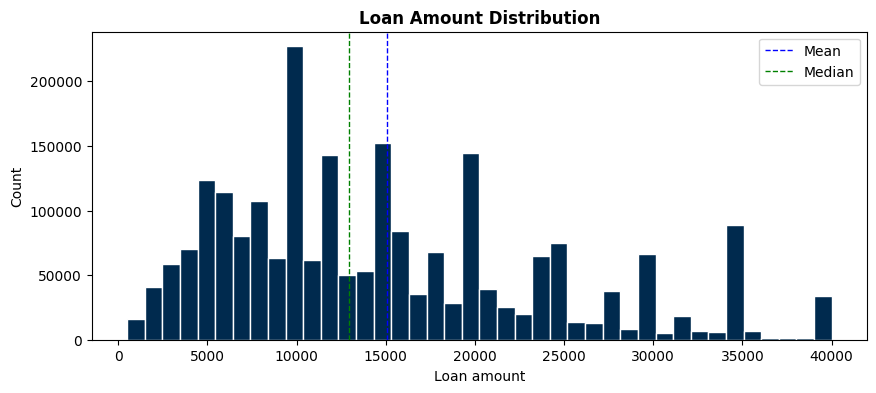

In [37]:
# Visualizar la distribución de 'loan_amount' mediante un histograma

plt.figure(figsize=(10,4))
plt.hist(df['loan_amnt'], bins = 40, color = '#002a4e', edgecolor = 'white')

# Lineas de mean y median
plt.axvline(df['loan_amnt'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['loan_amnt'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

# Etiquetas
plt.legend()
plt.xlabel('Loan amount')
plt.ylabel('Count')
plt.title('Loan Amount Distribution', fontsize=12, fontweight='bold')

print("Distribución de Monto de Préstamo:")
display(df['loan_amnt'].describe().round(1).to_frame())
plt.show()



#### Funded amount distribution (Monto financiado)

La variable `funde_amnt` representa el monto total de dinero que ha sido aprobado y financiado por los prestamistas a un prestatario. Es la cantidad total que se ha entregado al prestatario para el préstamo.

Distribución de monto financiado:


,funded_amnt
count,2254562.0
mean,15041.1
std,9183.5
min,500.0
25%,8000.0
50%,12875.0
75%,20000.0
max,40000.0


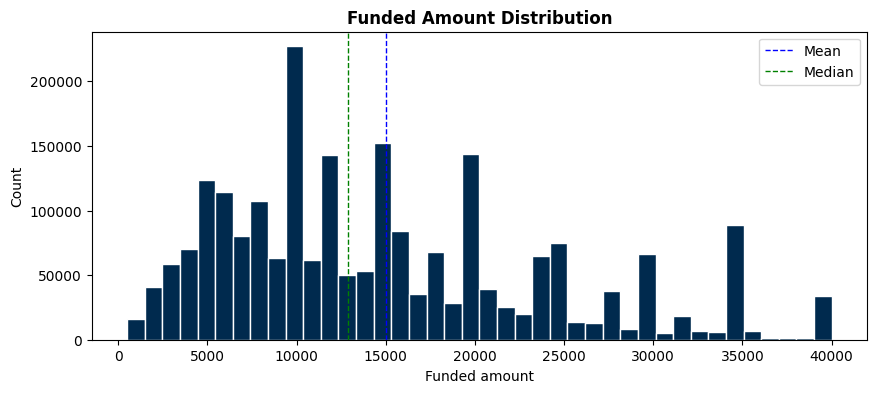

In [40]:
# Visualizar la distribución de 'funded_amount' mediante un histograma

plt.figure(figsize=(10,4))
plt.hist(df['funded_amnt'], bins = 40, color = '#002a4e', edgecolor = 'white')

# Lineas de mean y median
plt.axvline(df['funded_amnt'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['funded_amnt'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

# Etiquetas
plt.legend()
plt.xlabel('Funded amount')
plt.ylabel('Count')
plt.title('Funded Amount Distribution', fontsize=12, fontweight='bold')

print("Distribución de Monto Financiado:")
display(df['funded_amnt'].describe().round(1).to_frame())
plt.show()

La similitud entre las distribuciones de monto del prestamo y monto financiado sugiere que la mayoría de los préstamos están siendo financiados en su totalidad por los prestamistas. En otras palabras, el monto que se solicita como préstamo (loan amount) es prácticamente el mismo que el monto que se ha efectivamente financiado (funded amount).

#### Interes rate distribution (Tasa de interés)

La variable `int_rate` representa la tasa de interés anual que se aplica al préstamo. Es el porcentaje que el prestatario debe pagar además del monto del préstamo, calculado sobre el saldo pendiente del préstamo.

Distribución de tasa de interés:


,int_rate
count,2254562.0
mean,13.1
std,4.8
min,5.3
25%,9.5
50%,12.6
75%,16.0
max,31.0


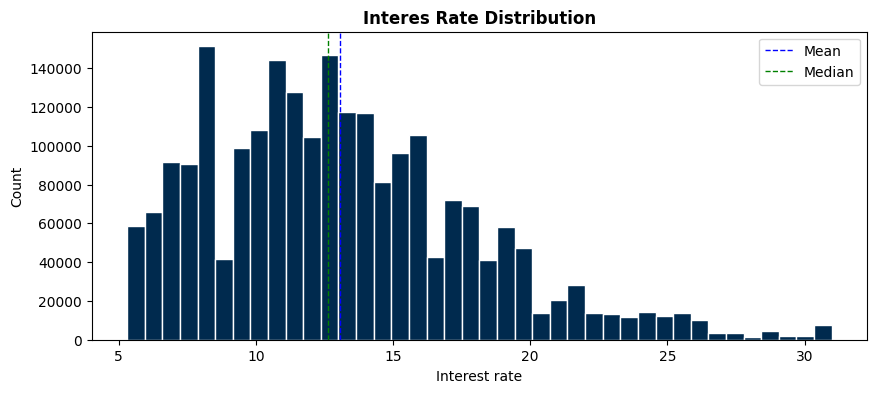

In [43]:
# Visualizar la distribución de 'interes_rate' mediante un histograma

plt.figure(figsize=(10,4))
plt.hist(df['int_rate'], bins = 40, color = '#002a4e', edgecolor = 'white')

# Lineas de mean y median
plt.axvline(df['int_rate'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['int_rate'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

# Etiquetas
plt.legend()
plt.xlabel('Interest rate')
plt.ylabel('Count')
plt.title('Interes Rate Distribution', fontsize=12, fontweight='bold')

print("Distribución de Tasa de Interés:")
display(df['int_rate'].describe().round(1).to_frame())
plt.show()

#### Annual income distribution (Ingresos anuales)

La variable `annual_inc`  representa el ingreso anual del prestatario. El prestatario proporciona la información sobre sus ingresos anuales como parte de la solicitud del préstamo. 

Distribución de Ingreso Anual:


,annual_inc
count,2254562.0
mean,78046.2
std,112759.7
min,0.0
25%,46000.0
50%,65000.0
75%,93000.0
max,110000000.0


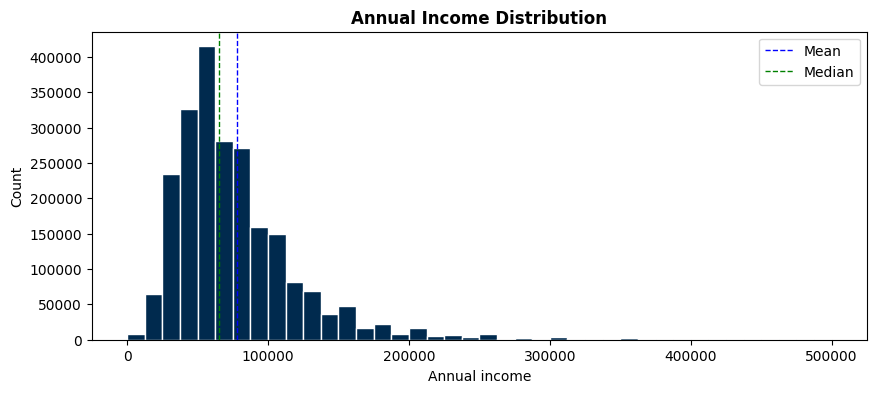

In [42]:
# Visualizar la distribución de 'annual income' mediante un histograma

plt.figure(figsize=(10,4))
plt.hist(df['annual_inc'], bins = 40, range = (0,500000), color = '#002a4e', edgecolor = 'white')

# Lineas de mean y median
plt.axvline(df['annual_inc'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['annual_inc'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

# Etiquetas
plt.legend()
plt.xlabel('Annual income')
plt.ylabel('Count')
plt.title('Annual Income Distribution', fontsize=12, fontweight='bold')

print("Distribución de Ingreso Anual:")
display(df['annual_inc'].describe().round(1).to_frame())
plt.show()

#### Loan status (Estado del préstamo)

La variable `loan_status` indica el estado actual de un préstamo en el momento de la recopilación de los datos. Representa el progreso o resultado de un préstamo, indicando si está activo, cerrado, o en alguna fase de morosidad o incumplimiento.

Distribución de Estado del Préstamo:


,loan_status
count,2254562
unique,9
top,Fully Paid
freq,1075676


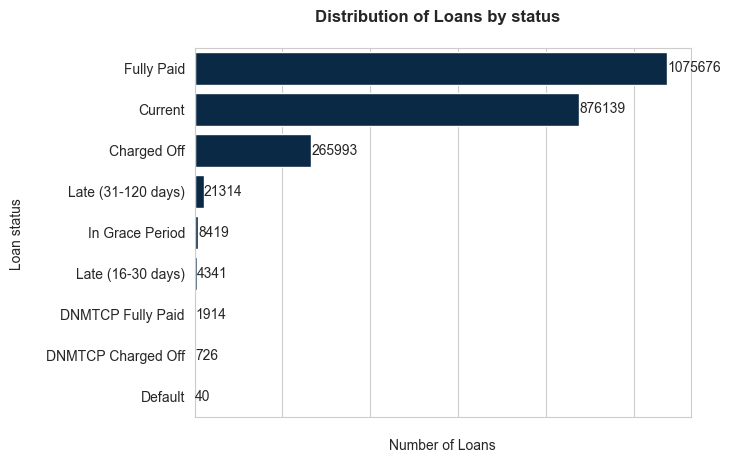

In [44]:
# Visualizar la distribución de 'loan_status' mediante un diagrama de barras

# Renombrar categorías
df['loan_status'] = df['loan_status'].replace({
    "Does not meet the credit policy. Status:Fully Paid":"DNMTCP Fully Paid",
    "Does not meet the credit policy. Status:Charged Off":"DNMTCP Charged Off"})

# Configurar estilo
sns.set_style("whitegrid")

sns.barplot(x= df['loan_status'].value_counts(),
            y= df['loan_status'].value_counts().index,
            color= '#002a4e')

# Añadir las etiquetas de frecuencia en cada barra
for index, value in enumerate(df['loan_status'].value_counts()):
    plt.text(value + 100, index, str(value), ha='left', va='center', fontsize=10)

# Ocultar el eje x y las etiquetas
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Título y etiquetas
plt.title('Distribution of Loans by status  \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nNumber of Loans')
plt.ylabel('Loan status \n')

print("Distribución de Estado del Préstamo:")
display(df['loan_status'].describe().round(1).to_frame())
plt.show()

#### Purpose (Motivo del préstamo)

La variable `purpose` describe el propósito o motivo del préstamo solicitado por el prestatario. Es una variable categórica que clasifica el tipo de gasto para el cual el préstamo fue requerido.

Distribución de Motivo del Préstamo:


,purpose
count,2254562
unique,14
top,debt_consolidation
freq,1274960


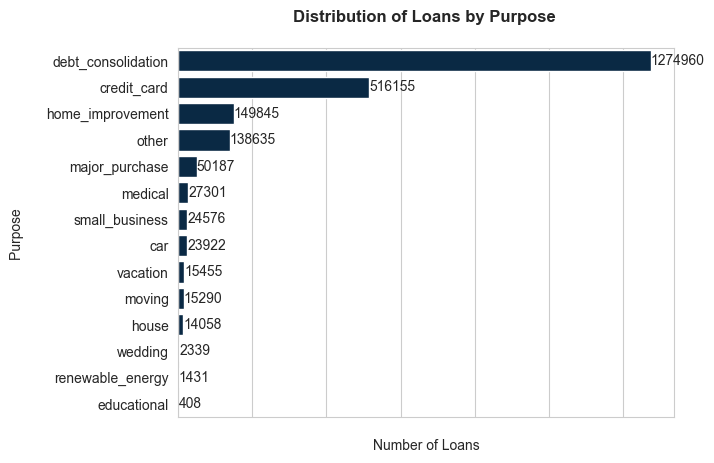

In [45]:
# Visualizar la distribución de 'purpose' mediante un diagrama de barras

# Configurar estilo
sns.set_style("whitegrid")

sns.barplot(x= df['purpose'].value_counts(),
            y= df['purpose'].value_counts().index,
            color= '#002a4e')

# Añadir las etiquetas de frecuencia en cada barra
for index, value in enumerate(df['purpose'].value_counts()):
    plt.text(value + 100, index, str(value), ha='left', va='center', fontsize=10)

# Ocultar el eje x y las etiquetas
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Título y etiquetas
plt.title('Distribution of Loans by Purpose \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nNumber of Loans')
plt.ylabel('Purpose \n')

print("Distribución de Motivo del Préstamo:")
display(df['purpose'].describe().round(1).to_frame())
plt.show()

#### Grade (Grado de prestamo asignado)

La variable `grade` representa la calificación del crédito del préstamo asignada por Lending Club. Esta calificación es una letra (A, B, C, D, E, F, G) que indica el nivel de riesgo asociado con el préstamo, donde la letra A representa el menor riesgo y la letra G el mayor riesgo.

Distribución de Grado Asignado:


,grade
count,2254562
unique,7
top,B
freq,662204


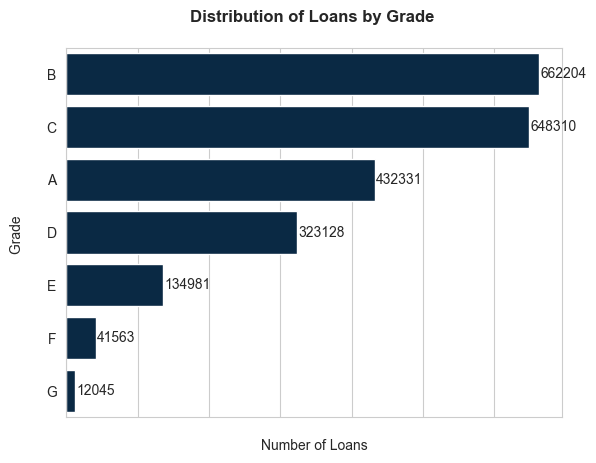

In [46]:
# Visualizar la distribución de 'grade' mediante un diagrama de barras

# Configurar estilo
sns.set_style("whitegrid")

sns.barplot(x= df['grade'].value_counts(),
            y= df['grade'].value_counts().index,
            color= '#002a4e')

# Añadir las etiquetas de frecuencia en cada barra
for index, value in enumerate(df['grade'].value_counts()):
    plt.text(value + 2000, index, str(value), ha='left', va='center', fontsize=10)

# Ocultar el eje x y las etiquetas
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Título y etiquetas
plt.title('Distribution of Loans by Grade \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nNumber of Loans')
plt.ylabel('Grade \n')

print("Distribución de Grado Asignado:")
display(df['grade'].describe().round(1).to_frame())
plt.show()

#### DTI (Relación deuda-ingreso)

La variable `dti` representa la proporción de la deuda total del prestatario en relación con sus ingresos mensuales. Se calcula como el porcentaje de los ingresos mensuales que se destina al pago de deudas. Un dti más alto puede indicar un mayor riesgo de incumplimiento, ya que el prestatario tiene una mayor proporción de su ingreso comprometida con el pago de deudas.

Distribución de Relación Deuda-Ingreso:


,dti
count,2254562.0
mean,18.8
std,14.2
min,-1.0
25%,11.9
50%,17.8
75%,24.5
max,999.0


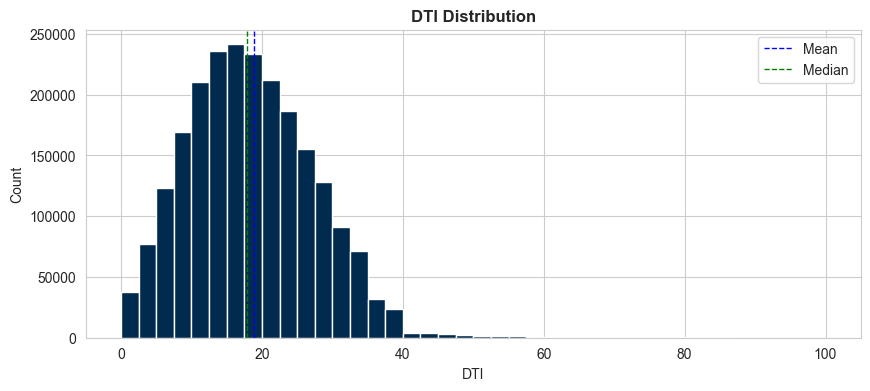

In [47]:
# Visualizar la distribución de 'Debt-to-income ratio' mediante un histograma

plt.figure(figsize=(10,4))
plt.hist(df['dti'], bins = 40, range= (0,100), color = '#002a4e', edgecolor = 'white')

# Lineas de mean y median
plt.axvline(df['dti'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['dti'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

# Etiquetas
plt.legend()
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('DTI Distribution', fontsize=12, fontweight='bold')

print("Distribución de Relación Deuda-Ingreso:")
display(df['dti'].describe().round(1).to_frame())
plt.show()

#### FICO range (Puntuación de crédito FICO)

Las variables `fico_range_low` y `fico_range_high` representan el limite inferior y superior de la puntuación de crédito FICO utilizada para evaluar la solvencia crediticia de un individuo. Los prestamistas utilizan el puntuaje FICO para tomar decisiones sobre la aprobación de préstamos, la oferta de tasas de interés y los límites de crédito. Un puntaje más alto generalmente resulta en mejores condiciones crediticias.

In [132]:
df[['fico_range_low', 'fico_range_high']].describe().round(1)

,fico_range_low,fico_range_high
count,2254562.0,2254562.0
mean,698.6,702.6
std,33.0,33.0
min,610.0,614.0
25%,675.0,679.0
50%,690.0,694.0
75%,715.0,719.0
max,845.0,850.0


Distribución de FICO Score:


,fico_score_mean
count,2254562.0
mean,700.6
std,33.0
min,612.0
25%,677.0
50%,692.0
75%,717.0
max,847.5


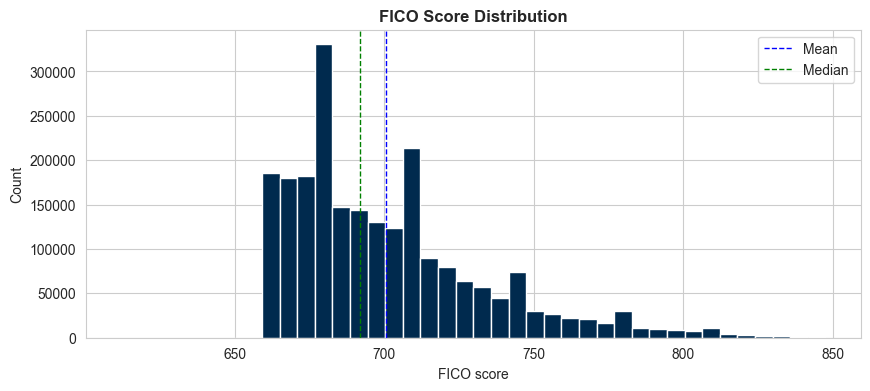

In [48]:
# Visualizar la distribución de 'fico score' mediante un histograma

# Calcular el promedio del rango FICO para cada registro/préstamo
df['fico_score_mean'] = (df['fico_range_high'] + df['fico_range_low']) / 2

plt.figure(figsize=(10,4))
plt.hist(df['fico_score_mean'], bins = 40, color = '#002a4e', edgecolor = 'white')

# Lineas de mean y median
plt.axvline(df['fico_score_mean'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['fico_score_mean'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

# Etiquetas
plt.legend()
plt.xlabel('FICO score')
plt.ylabel('Count')
plt.title('FICO Score Distribution', fontsize=12, fontweight='bold')

print("Distribución de FICO Score:")
display(df['fico_score_mean'].describe().round(1).to_frame())
plt.show()

#### Issue date (fecha del financiamiento del préstamo)

La variable `issue_d` indica la fecha (mes-año) en que se financió el préstamo.

In [49]:
# Convertir a fecha la variable 'issue_d'
df['issue_d'] = pd.to_datetime(df['issue_d'])

# Extraer año de la variable 'issue_d'
df['issue_year'] = df['issue_d'].dt.year

# Verificar conversión
df[['issue_d', 'issue_year']]

C:\Users\USER\AppData\Local\Temp\ipykernel_9420\2443411102.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])


,issue_d,issue_year
0,2015-12-01,2015
1,2015-12-01,2015
2,2015-12-01,2015
3,2015-12-01,2015
4,2015-12-01,2015
...,...,...
2254557,2016-10-01,2016
2254558,2016-10-01,2016
2254559,2016-10-01,2016
2254560,2016-10-01,2016


Distribución de Año de Emisión:


,issue_year
count,2254562
unique,12
top,2018
freq,492878


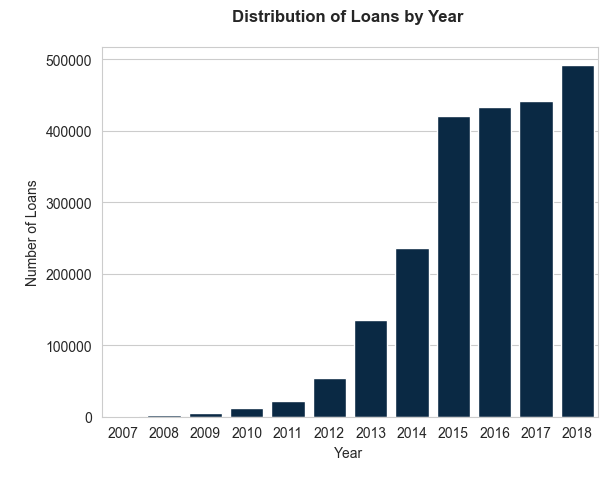

In [53]:
# Visualizar la distribución de los préstamos por año

# Configurar estilo
sns.set_style("whitegrid")

sns.barplot(x= df['issue_year'].value_counts().index,
            y= df['issue_year'].value_counts(),
            color= '#002a4e')

# Ocultar el eje x y las etiquetas
#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Título y etiquetas
plt.title('Distribution of Loans by Year \n', fontsize=12, fontweight='bold')
plt.ylabel(' \nNumber of Loans')
plt.xlabel('Year \n')

print("Distribución de Año de Emisión:")
display(df['issue_year'].astype('object').describe().round(1).to_frame())
plt.show()

## Good, Bad and Risky Loans

### Loan clasification

Para clasificar los estados de los préstamos en las categorías "Good," "Risky," y "Lost," se considerarán de la siguiente manera:

**Good**

- Fully Paid: El préstamo ha sido pagado en su totalidad, indicando un desempeño positivo.  
- Current: El préstamo está al día y no tiene pagos atrasados, lo que sugiere que el prestatario está cumpliendo con sus pagos.
- Does not meet the credit policy. Status: Fully Paid: Préstamos que fueron pagados en su totalidad, pero que no cumplirían con las políticas de crédito actuales.

**Risky**
- Late (16-30 days): El préstamo tiene retrasos menores, lo que podría ser un indicador de riesgo pero no necesariamente grave.
- Late (31-120 days): El préstamo tiene retrasos significativos, lo que indica un mayor nivel de riesgo. 
- In Grace Period: El préstamo está en un período de gracia, generalmente indicando que el prestatario puede estar realizando pagos bajo condiciones especiales.

**Bad**
- Charged Off: El préstamo ha sido dado por perdido, lo que significa que la institución considera que no se recuperará.
- Default: El préstamo está en incumplimiento, lo que indica que el prestatario no ha pagado según los términos acordados y es probable que no se recupere.
- Does not meet the credit policy. Status: Charged Off: Préstamos que fueron dados por perdido, pero que no cumplirían con las políticas de crédito actuales.

Esta clasificación nos permitirá tener una visión clara del estado actual de la cartera de crédito y facilitará el análisis del riesgo asociado a los diferentes segmentos.

In [54]:
# Clasificar los prestamos en las condiciones establecidas según su estado

df['loan_condition'] = np.select(
    [
        df['loan_status'] == "Fully Paid",
        df['loan_status'] == "Current",
        df['loan_status'] == "DNMTCP Fully Paid",
        df['loan_status'] == "Late (16-30 days)",
        df['loan_status'] == "Late (31-120 days)",
        df['loan_status'] == "In Grace Period",
        df['loan_status'] == "Charged Off",
        df['loan_status'] == "Default",
        df['loan_status'] == "DNMTCP Charged Off",
    ],
    [
        'Good', 
        'Good', 
        'Good',
        'Risky', 
        'Risky', 
        'Risky',
        'Bad', 
        'Bad', 
        'Bad'
    ],
    default='Unknown' 
)

# Verificar clasificación de los préstamos
df[['loan_status','loan_condition']].sample(20)

,loan_status,loan_condition
1338123,Fully Paid,Good
1520879,Current,Good
690684,Charged Off,Bad
1826057,Fully Paid,Good
1358240,Current,Good
1963627,Fully Paid,Good
103594,Fully Paid,Good
1678410,Fully Paid,Good
1954275,In Grace Period,Risky
588866,Current,Good


Distribución de Condición del Préstamo:


,count
loan_condition,
Good,1953729
Bad,266759
Risky,34074


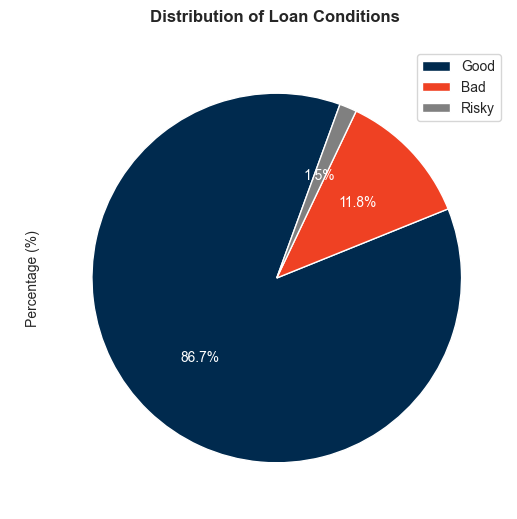

In [56]:
# Visualizar la distribución de loan condition mediante un pie chart

plt.figure(figsize=(8,6))

plt.pie(x = df['loan_condition'].value_counts(),
        labels = df['loan_condition'].value_counts().index,
        autopct ='%1.1f%%',
        startangle = 70,
        colors = ['#002a4e', '#ef4123', 'grey'],
        textprops={'color':'white'})

# Título y etiquetas
plt.legend()
plt.title('Distribution of Loan Conditions \n', fontsize=12, fontweight='bold')
plt.ylabel(' \nPercentage (%)')

print("Distribución de Condición del Préstamo:")
display(df['loan_condition'].value_counts().to_frame())
plt.show()

### Loan amount and loan condition

  loan_condition  median_loan_amnt
0            Bad           14350.0
1           Good           12500.0
2          Risky           15000.0


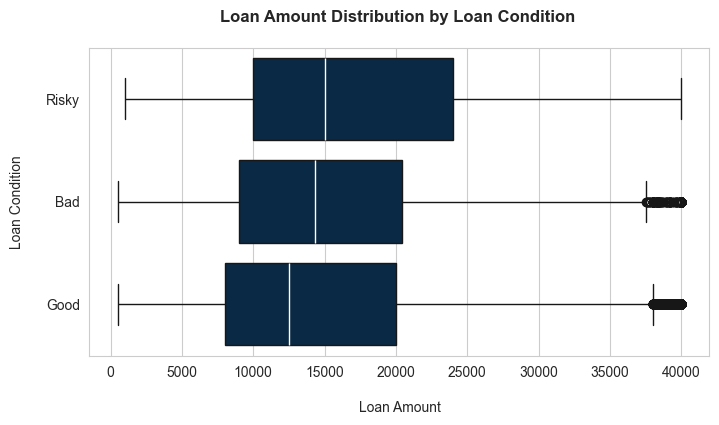

In [65]:
# Visualizar la distribución de monto de préstamo por condición de préstamo

plt.figure(figsize=(8,4))

sns.boxplot(x= df['loan_amnt'],
            y= df['loan_condition'],
            color= '#002a4e',
            medianprops={'color': 'white'},
            order= df.groupby('loan_condition')['loan_amnt'].median().sort_values(ascending=False).index)

# Título y etiquetas
plt.title('Loan Amount Distribution by Loan Condition \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nLoan Amount')
plt.ylabel('Loan Condition\n')

print(df.groupby('loan_condition')['loan_amnt'].median().reset_index().rename(columns={'loan_amnt':'median_loan_amnt'}))
plt.show()

### Annual income and loan condition

  loan_condition  median_annual_inc
0            Bad            60000.0
1           Good            65500.0
2          Risky            65000.0


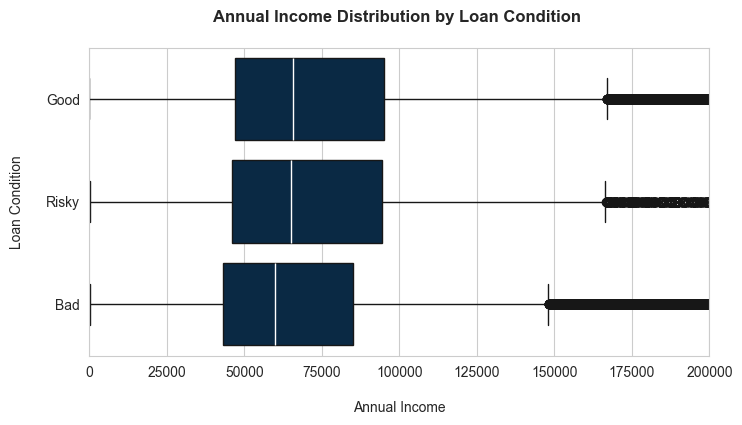

In [66]:
# Visualizar la distribución de ingreso anual por condición de préstamo

plt.figure(figsize=(8,4))

sns.boxplot(x= df['annual_inc'],
            y= df['loan_condition'],
            color= '#002a4e',
            medianprops={'color': 'white'},
            order= df.groupby('loan_condition')['annual_inc'].median().sort_values(ascending=False).index)

# Ajustar el rango del eje x
plt.xlim(0, 200000)

# Título y etiquetas
plt.title('Annual Income Distribution by Loan Condition \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nAnnual Income')
plt.ylabel('Loan Condition\n')

print(df.groupby('loan_condition')['annual_inc'].median().reset_index().rename(columns={'annual_inc':'median_annual_inc'}))
plt.show()

In [60]:
# Agrupar los valores de ingreso anual en bins

# Definir los rangos y las etiquetas
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, df['annual_inc'].max()]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '>140k']

# Crear nueva variable con los rangos de ingreso anual
df['annual_income_bins'] = pd.cut(df['annual_inc'], bins=bins, labels=labels, include_lowest=True)

# Verificar la creación de bins
print(df[['annual_inc', 'annual_income_bins']].sample(10))


         annual_inc annual_income_bins
1899921     50000.0            40k-60k
444242      58000.0            40k-60k
1963345     66500.0            60k-80k
1497484    140000.0          120k-140k
449263      33000.0            20k-40k
1279495    120000.0          100k-120k
690695      93000.0           80k-100k
1921525     72000.0            60k-80k
545754      75000.0            60k-80k
1295517    108000.0          100k-120k


C:\Users\USER\AppData\Local\Temp\ipykernel_9420\278116667.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_income_by_loan_condition = df.groupby(['annual_income_bins', 'loan_condition', ])['id'].count().round(2).reset_index() \


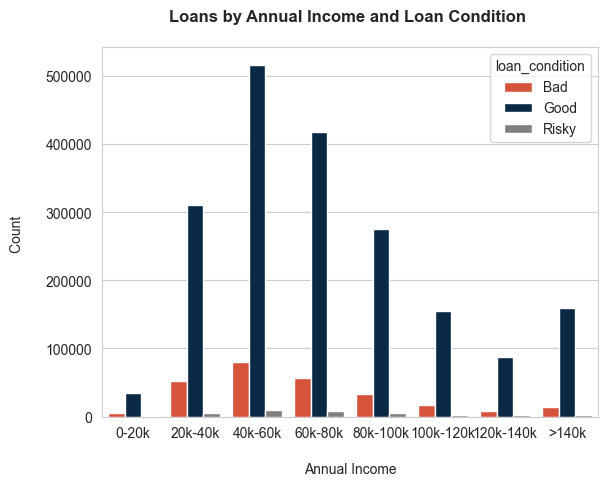

In [61]:
# Número de prestamos por ingreso anual y condición del prestamo
annual_income_by_loan_condition = df.groupby(['annual_income_bins', 'loan_condition', ])['id'].count().round(2).reset_index() \
    .rename(columns={'id':'n_loans'})

# Visualizar el número de prestamos por ingresos anuales y condición

# Configurar estilo
sns.set_style("whitegrid")

sns.barplot(x= annual_income_by_loan_condition['annual_income_bins'],
            y= annual_income_by_loan_condition['n_loans'],
            hue= annual_income_by_loan_condition['loan_condition'],
            palette= {
                        'Good': '#002a4e',
                        'Risky': 'grey',
                        'Bad': '#ef4123'
                    })

# Título y etiquetas
plt.title('Loans by Annual Income and Loan Condition \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nAnnual Income')
plt.ylabel('Count \n')
plt.show()

### Interes rate and loan condition

  loan_condition  median_int_rate
0            Bad            15.05
1           Good            12.12
2          Risky            14.99


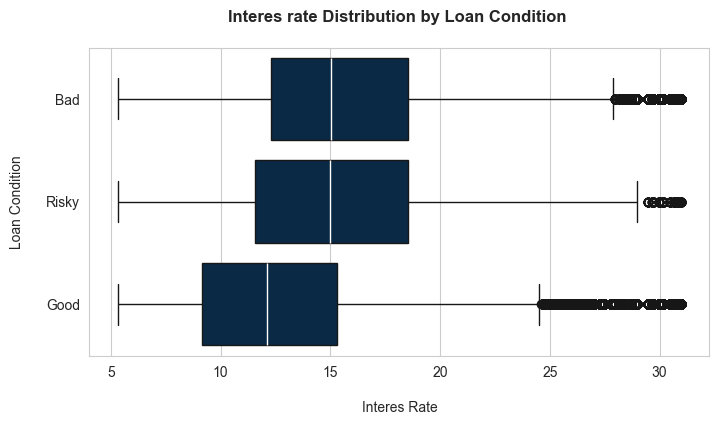

In [62]:
# Visualizar la distribución de tasa de interés por condición de préstamo

plt.figure(figsize=(8,4))

sns.boxplot(x= df['int_rate'],
            y= df['loan_condition'],
            color= '#002a4e',
            medianprops={'color': 'white'},
            order= df.groupby('loan_condition')['int_rate'].median().sort_values(ascending=False).index)

# Título y etiquetas
plt.title('Interes rate Distribution by Loan Condition \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nInteres Rate')
plt.ylabel('Loan Condition\n')

print(df.groupby('loan_condition')['int_rate'].median().reset_index().rename(columns={'int_rate':'median_int_rate'}))
plt.show()

In [67]:
# Agrupar los valores de tasa de interés en bins

# Definir los rangos y las etiquetas
bins = [0, 10, 15, 20, 25, 30, df['int_rate'].max()]
labels = ['<10%', '10-15%', '15-20%', '20-25%', '25-30%', '>30%']

# Crear nueva variable con los rangos de ingreso anual
df['int_rate_bins'] = pd.cut(df['int_rate'], bins=bins, labels=labels, include_lowest=True)

# Verificar la creación de bins
print(df[['int_rate', 'int_rate_bins']].sample(10))

         int_rate int_rate_bins
1091685     13.44        10-15%
389631      16.49        15-20%
1857163     13.11        10-15%
298156       9.17          <10%
2020505     10.99        10-15%
1862595      6.62          <10%
291132       9.17          <10%
1804945     13.68        10-15%
1194532      9.17          <10%
1353215     15.02        15-20%


C:\Users\USER\AppData\Local\Temp\ipykernel_9420\796229048.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  int_rate_by_loan_condition = df.groupby(['int_rate_bins', 'loan_condition', ])['id'].count().round(2).reset_index() \


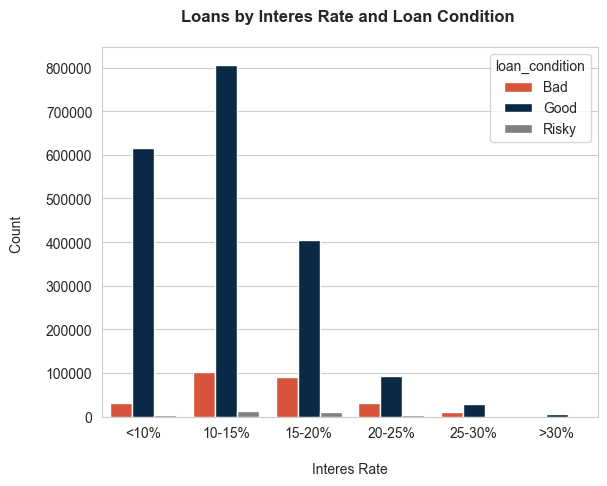

In [68]:
# Número de prestamos por tasa de interes y condición del prestamo
int_rate_by_loan_condition = df.groupby(['int_rate_bins', 'loan_condition', ])['id'].count().round(2).reset_index() \
    .rename(columns={'id':'n_loans'})

# Visualizar el número de prestamos por ingresos anuales y condición

# Configurar estilo
sns.set_style("whitegrid")

sns.barplot(x= int_rate_by_loan_condition['int_rate_bins'],
            y= int_rate_by_loan_condition['n_loans'],
            hue= int_rate_by_loan_condition['loan_condition'],
            palette= {
                        'Good': '#002a4e',
                        'Risky': 'grey',
                        'Bad': '#ef4123'
                    })

# Título y etiquetas
plt.title('Loans by Interes Rate and Loan Condition \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nInteres Rate')
plt.ylabel('Count \n')
plt.show()

### DTI and loan condition

  loan_condition  median_dti
0            Bad       19.78
1           Good       17.57
2          Risky       18.84


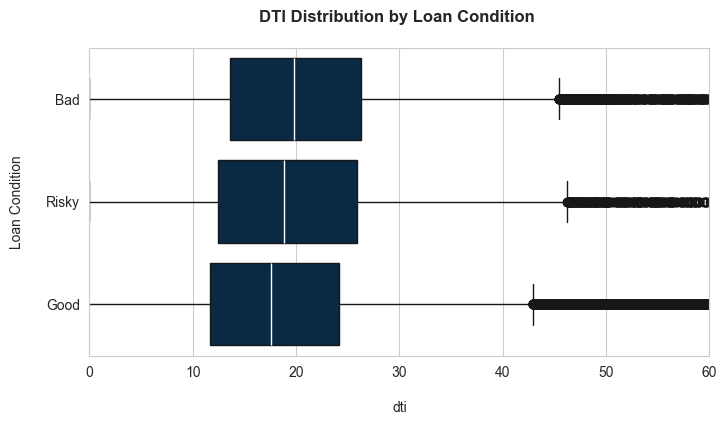

In [70]:
# Visualizar la distribución de relación deuda-ingreso por condición de préstamo

plt.figure(figsize=(8,4))

sns.boxplot(x= df['dti'],
            y= df['loan_condition'],
            color= '#002a4e',
            medianprops={'color': 'white'},
            order= df.groupby('loan_condition')['dti'].median().sort_values(ascending=False).index)

# Ajustar el rango del eje x
plt.xlim(0, 60)

# Título y etiquetas
plt.title('DTI Distribution by Loan Condition \n', fontsize=12, fontweight='bold')
plt.xlabel(' \ndti')
plt.ylabel('Loan Condition\n')

print(df.groupby('loan_condition')['dti'].median().reset_index().rename(columns={'dti':'median_dti'}))
plt.show()

In [72]:
# Agrupar los valores de dti en bins

# Definir los rangos y las etiquetas
bins = [-5, 5, 10, 15, 20, 25, df['dti'].max()]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '>25']

# Crear nueva variable con los rangos de ingreso anual
df['dti_bins'] = pd.cut(df['dti'], bins=bins, labels=labels, include_lowest=True)

# Verificar la creación de bins
print(df[['dti', 'dti_bins']].sample(10))

           dti dti_bins
1244941  26.15      >25
330193    7.57     5-10
1156478  14.28    10-15
1294885  29.48      >25
1904556  10.23    10-15
1410533  13.76    10-15
986547    8.91     5-10
1976992  23.26    20-25
1530117  10.32    10-15
825336   11.78    10-15


C:\Users\USER\AppData\Local\Temp\ipykernel_9420\1782322023.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_by_loan_condition = df.groupby(['dti_bins', 'loan_condition', ])['id'].count().round(2).reset_index() \


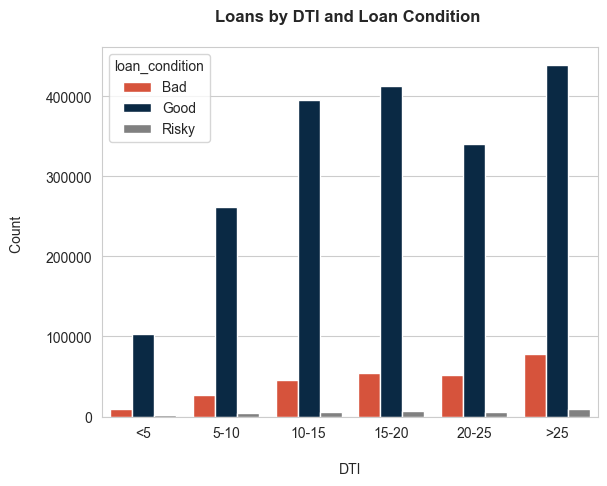

In [74]:
# Número de prestamos por dti y condición del prestamo
dti_by_loan_condition = df.groupby(['dti_bins', 'loan_condition', ])['id'].count().round(2).reset_index() \
    .rename(columns={'id':'n_loans'})

# Visualizar el número de prestamos por ingresos anuales y condición

# Configurar estilo
sns.set_style("whitegrid")

sns.barplot(x= dti_by_loan_condition['dti_bins'],
            y= dti_by_loan_condition['n_loans'],
            hue= dti_by_loan_condition['loan_condition'],
            palette= {
                        'Good': '#002a4e',
                        'Risky': 'grey',
                        'Bad': '#ef4123'
                    })

# Título y etiquetas
plt.title('Loans by DTI and Loan Condition \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nDTI')
plt.ylabel('Count \n')
plt.show()

### FICO score and loan condition 

  loan_condition  median_fico_score
0            Bad              682.0
1           Good              697.0
2          Risky              687.0


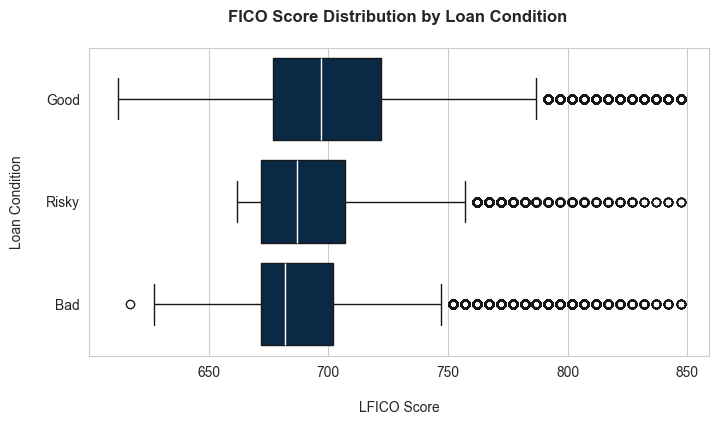

In [75]:
# Visualizar la distribución de puntuación FICO por condición de préstamo

plt.figure(figsize=(8,4))

sns.boxplot(x= df['fico_score_mean'],
            y= df['loan_condition'],
            color= '#002a4e',
            medianprops={'color': 'white'},
            order= df.groupby('loan_condition')['fico_score_mean'].median().sort_values(ascending=False).index)

# Título y etiquetas
plt.title('FICO Score Distribution by Loan Condition \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nLFICO Score')
plt.ylabel('Loan Condition\n')

print(df.groupby('loan_condition')['fico_score_mean'].median().reset_index().rename(columns={'fico_score_mean':'median_fico_score'}))
plt.show()

In [77]:
# Asignar niveles a los puntajes FICO
df['fico_level'] = pd.cut(df['fico_score_mean'], bins=[300, 580, 670, 740, 800, 850], 
                          labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
                          include_lowest=True)

# Verificar la asignación
df[['fico_score_mean', 'fico_level']].sample(10)

,fico_score_mean,fico_level
1434977,812.0,Excellent
537819,672.0,Good
310333,667.0,Fair
2019724,687.0,Good
156482,707.0,Good
280910,697.0,Good
1283618,672.0,Good
1090496,682.0,Good
1335692,712.0,Good
904993,692.0,Good


C:\Users\USER\AppData\Local\Temp\ipykernel_9420\2067396809.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_condition_by_fico_level = df.groupby(['loan_condition', 'fico_level'])['id'].count().reset_index()\
C:\Users\USER\AppData\Local\Temp\ipykernel_9420\2067396809.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index= 'fico_level', columns= 'loan_condition', values= 'id').astype(int)


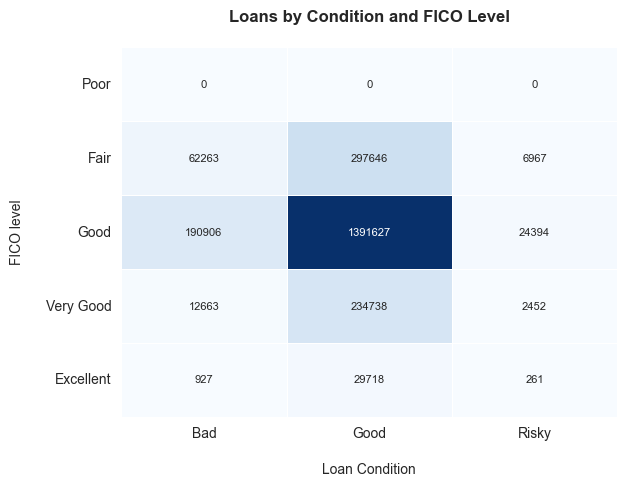

In [80]:
# Distribución de los préstamos por condición y termino
loan_condition_by_fico_level = df.groupby(['loan_condition', 'fico_level'])['id'].count().reset_index()\
    .pivot_table(index= 'fico_level', columns= 'loan_condition', values= 'id').astype(int)

# Crear HeatMap de la distribución de los préstamos por condición y término
sns.heatmap(loan_condition_by_fico_level, cmap='Blues', cbar= False, annot=True, annot_kws={"fontsize": 8},  
            fmt=".0f", linewidths=0.5)

# Agregar etiquetas a los ejes
plt.xlabel(' \nLoan Condition')
plt.ylabel('FICO level\n ')
plt.title('Loans by Condition and FICO Level\n', fontsize=12, fontweight='bold')

# Rotar las etiquetas del eje
plt.xticks(rotation=0) 
plt.yticks(rotation=0)

plt.show()

### Terms and loan condition

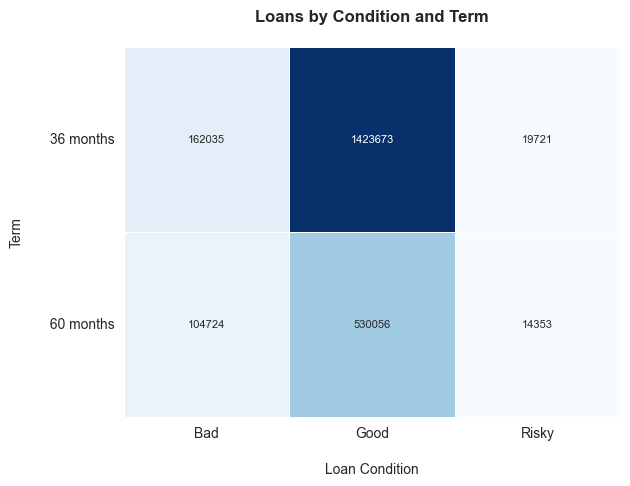

In [81]:
# Distribución de los préstamos por condición y termino
loan_condition_by_term = df.groupby(['loan_condition', 'term'])['id'].count().reset_index()\
    .pivot_table(index= 'term', columns= 'loan_condition', values= 'id').astype(int)

# Crear HeatMap de la distribución de los préstamos por condición y término
sns.heatmap(loan_condition_by_term, cmap='Blues', cbar= False, annot=True, annot_kws={"fontsize": 8},  
            fmt=".0f", linewidths=0.5)

# Agregar etiquetas a los ejes
plt.xlabel(' \nLoan Condition')
plt.ylabel('Term\n ')
plt.title('Loans by Condition and Term\n', fontsize=12, fontweight='bold')

# Rotar las etiquetas del eje
plt.xticks(rotation=0) 
plt.yticks(rotation=0)

plt.show()

### Grade and loan condition

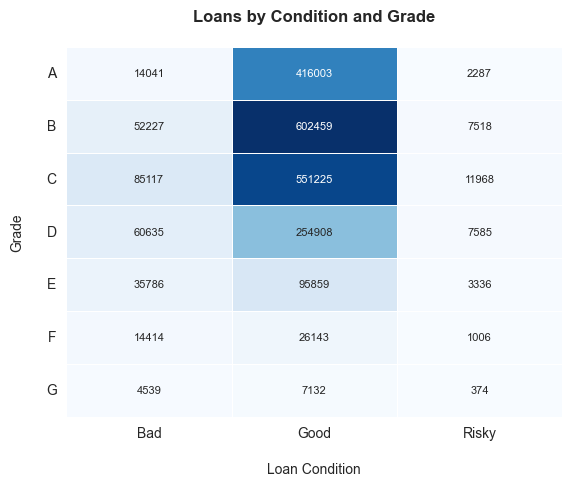

In [82]:
# Distribución de los préstamos por condición y grado
loan_condition_by_grade = df.groupby(['loan_condition', 'grade'])['id'].count().reset_index()\
    .pivot_table(index= 'grade', columns= 'loan_condition', values= 'id').astype(int)

# Crear HeatMap de la distribución de los préstamos por condición y grado
sns.heatmap(loan_condition_by_grade, cmap='Blues', cbar= False, annot=True, annot_kws={"fontsize": 8},  
            fmt=".0f", linewidths=0.5)

# Agregar etiquetas a los ejes
plt.xlabel(' \nLoan Condition')
plt.ylabel('Grade\n ')
plt.title('Loans by Condition and Grade\n', fontsize=12, fontweight='bold')

# Rotar las etiquetas del eje
plt.xticks(rotation=0) 
plt.yticks(rotation=0)

plt.show()

### Purpose and loan condition

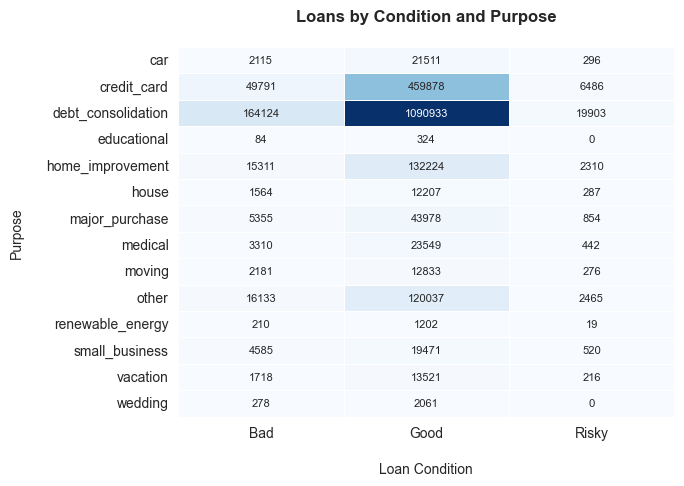

In [83]:
# Distribución de los préstamos por condición y motivo
loan_condition_by_purpose = df.groupby(['loan_condition', 'purpose'])['id'].count().reset_index()\
    .pivot_table(index= 'purpose', columns= 'loan_condition', values= 'id').fillna(0).astype(int)
    
# Crear HeatMap de la distribución de los préstamos por condición y motivo
sns.heatmap(loan_condition_by_purpose, cmap='Blues', cbar= False, annot=True, annot_kws={"fontsize": 8},  
            fmt=".0f", linewidths=0.5)

# Agregar etiquetas a los ejes
plt.xlabel(' \nLoan Condition')
plt.ylabel('Purpose\n ')
plt.title('Loans by Condition and Purpose\n', fontsize=12, fontweight='bold')

# Rotar las etiquetas del eje
plt.xticks(rotation=0) 
plt.yticks(rotation=0)

plt.show()

### Loan condition by Year


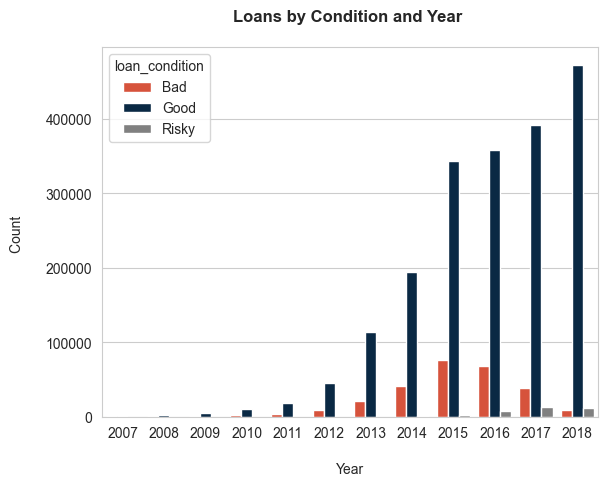

In [84]:
# Número de préstamos por condición y año
loan_condition_by_year = df.groupby(['issue_year', 'loan_condition', ])['id'].count().round(2).reset_index() \
    .rename(columns={'id':'num_loans'})

# Visualizar el número de prestamos por condición y año

# Configurar estilo
sns.set_style("whitegrid")

sns.barplot(x= loan_condition_by_year['issue_year'],
            y= loan_condition_by_year['num_loans'],
            hue= loan_condition_by_year['loan_condition'],
            palette= {
                        'Good': '#002a4e',
                        'Risky': 'grey',
                        'Bad': '#ef4123'
                    })

# Título y etiquetas
plt.title('Loans by Condition and Year \n', fontsize=12, fontweight='bold')
plt.xlabel(' \nYear')
plt.ylabel('Count \n')
plt.show()